In [32]:
import warnings
warnings.filterwarnings('ignore')


In [34]:
import gensim 
from gensim.models import Word2Vec, KeyedVectors

In [35]:
import pandas as pd

In [36]:
train_data=pd.read_csv("/Users/yughjuneja/Downloads/Hackathon/datapath/train.csv")
test_data=pd.read_csv("/Users/yughjuneja/Downloads/Hackathon/datapath/test.csv")

In [38]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

In [7]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

In [39]:
# Step 1: Get unique categories and subcategories
train_categories = set(train_data_copy['category'].unique())
test_categories = set(test_data_copy['category'].unique())
train_subcategories = set(train_data_copy['sub_category'].unique())
test_subcategories = set(test_data_copy['sub_category'].unique())

# Step 2: Find the union of categories and subcategories
all_categories = train_categories.union(test_categories)
all_subcategories = train_subcategories.union(test_subcategories)

# Step 3: Replace categories and subcategories not in the union with "Unknown"
train_data_copy['category'] = train_data_copy['category'].apply(lambda x: x if x in all_categories else 'Unknown')
train_data_copy['sub_category'] = train_data_copy['sub_category'].apply(lambda x: x if x in all_subcategories else 'Unknown')

test_data_copy['category'] = test_data_copy['category'].apply(lambda x: x if x in all_categories else 'Unknown')
test_data_copy['sub_category'] = test_data_copy['sub_category'].apply(lambda x: x if x in all_subcategories else 'Unknown')

# Save updated datasets
train_data_copy.to_csv("train_with_unknown.csv", index=False)
test_data_copy.to_csv("test_with_unknown.csv", index=False)


In [40]:
train_subcategories = train_data['sub_category'].unique()
test_subcategories = test_data['sub_category'].unique()

# Convert them to sets for easier comparison
train_subcategory_set = set(train_subcategories)
test_subcategory_set = set(test_subcategories)

# Find the subcategories that are in train but not in test
train_only = train_subcategory_set - test_subcategory_set

# Find the subcategories that are in test but not in train
test_only = test_subcategory_set - train_subcategory_set

# Print the results
print("Subcategories in train but not in test:", train_only)
print("Subcategories in test but not in train:", test_only)

Subcategories in train but not in test: {'Against Interest of sovereignty or integrity of India'}
Subcategories in test but not in train: {'Cyber Blackmailing & Threatening', 'Computer Generated CSAM/CSEM', 'Sexual Harassment'}


In [41]:
train_data_copy

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [42]:
test_data_copy

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [43]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


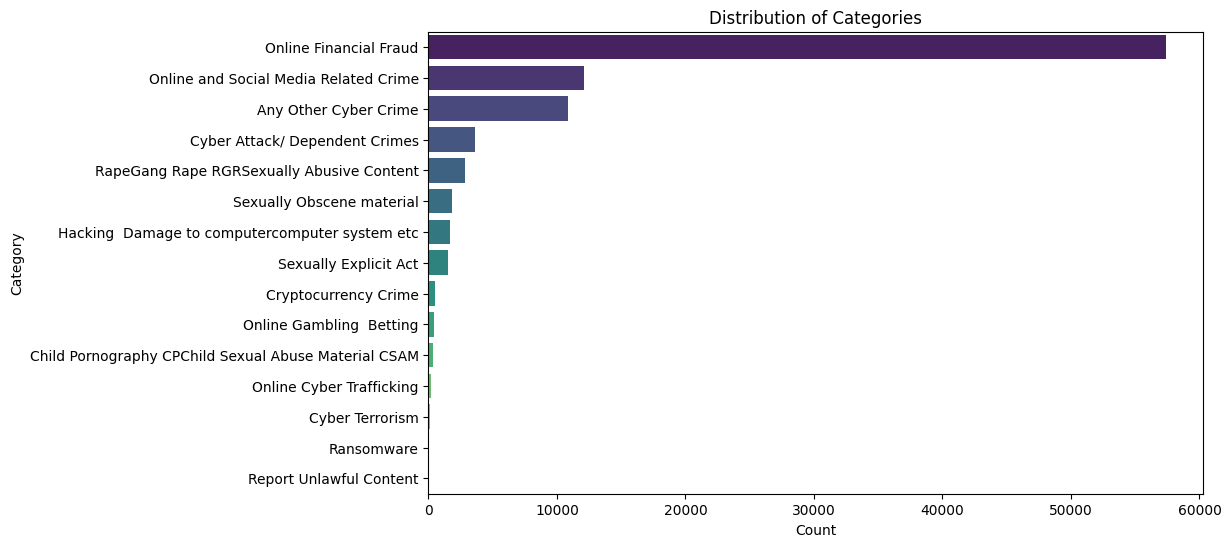

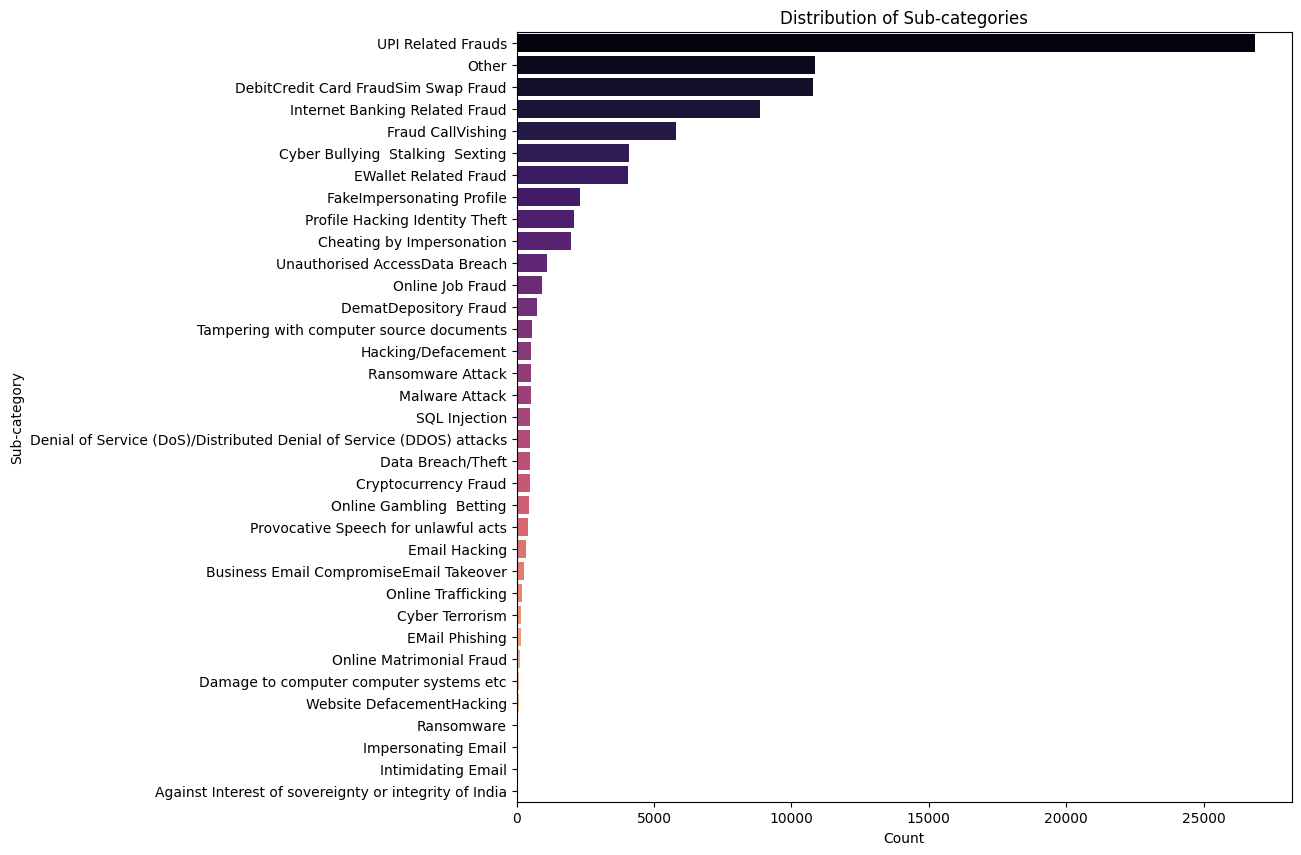

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['category'], order=train_data['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Sub-category Distribution
plt.figure(figsize=(10, 10))
sns.countplot(y=train_data['sub_category'], order=train_data['sub_category'].value_counts().index, palette='magma')
plt.title("Distribution of Sub-categories")
plt.xlabel("Count")
plt.ylabel("Sub-category")
plt.show()


1463.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


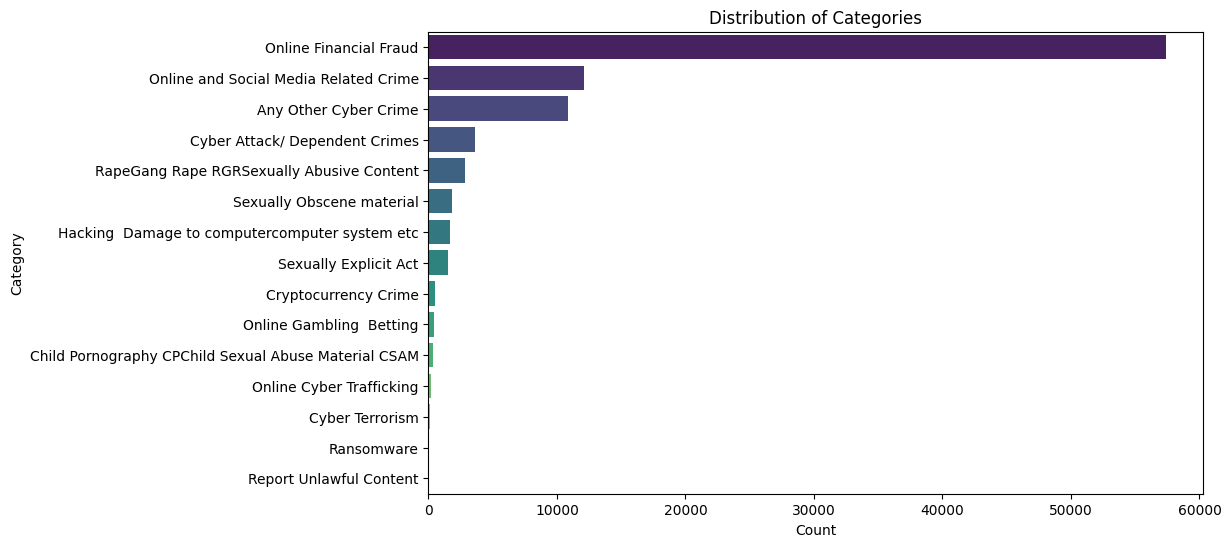

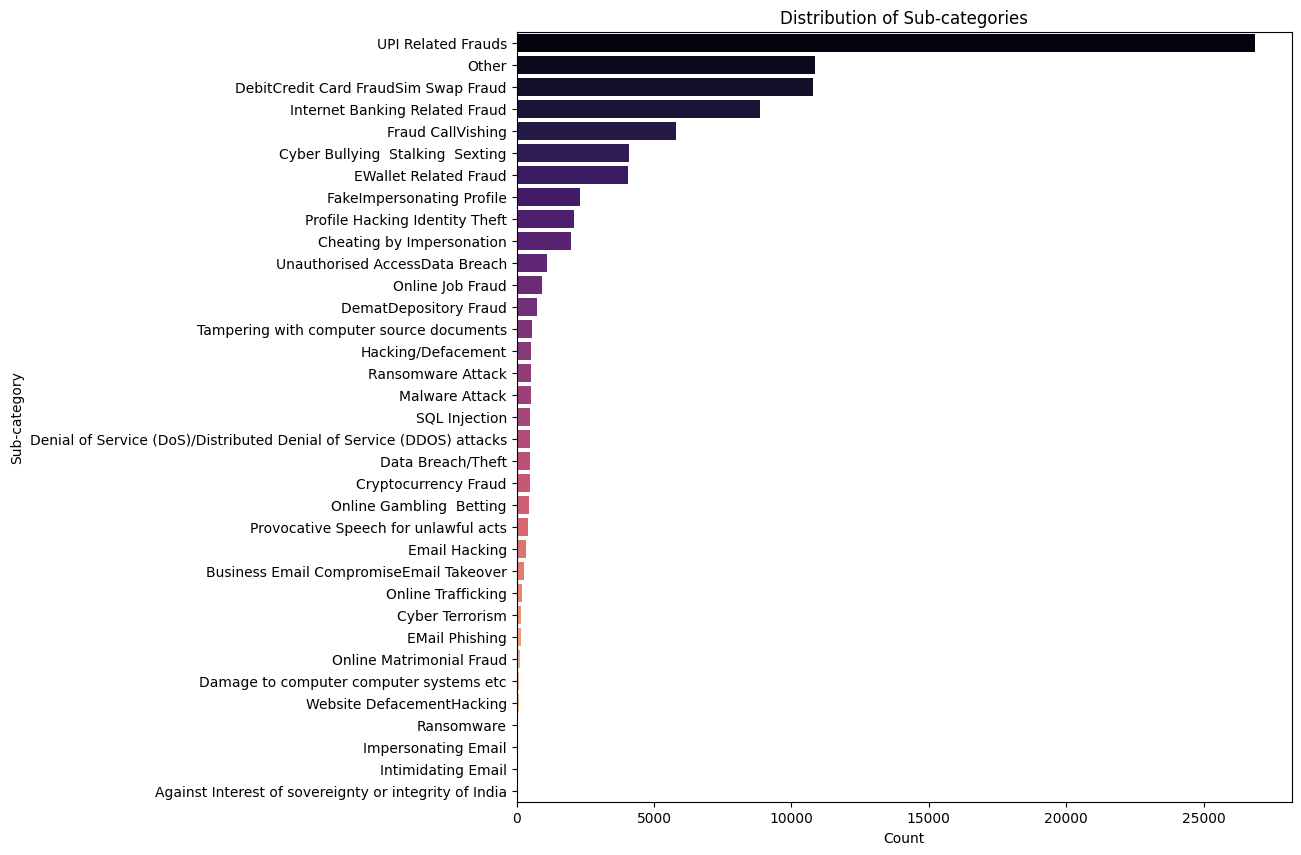

In [45]:
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['category'], order=train_data['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Sub-category Distribution
plt.figure(figsize=(10, 10))
sns.countplot(y=train_data['sub_category'], order=train_data['sub_category'].value_counts().index, palette='magma')
plt.title("Distribution of Sub-categories")
plt.xlabel("Count")
plt.ylabel("Sub-category")
plt.show()


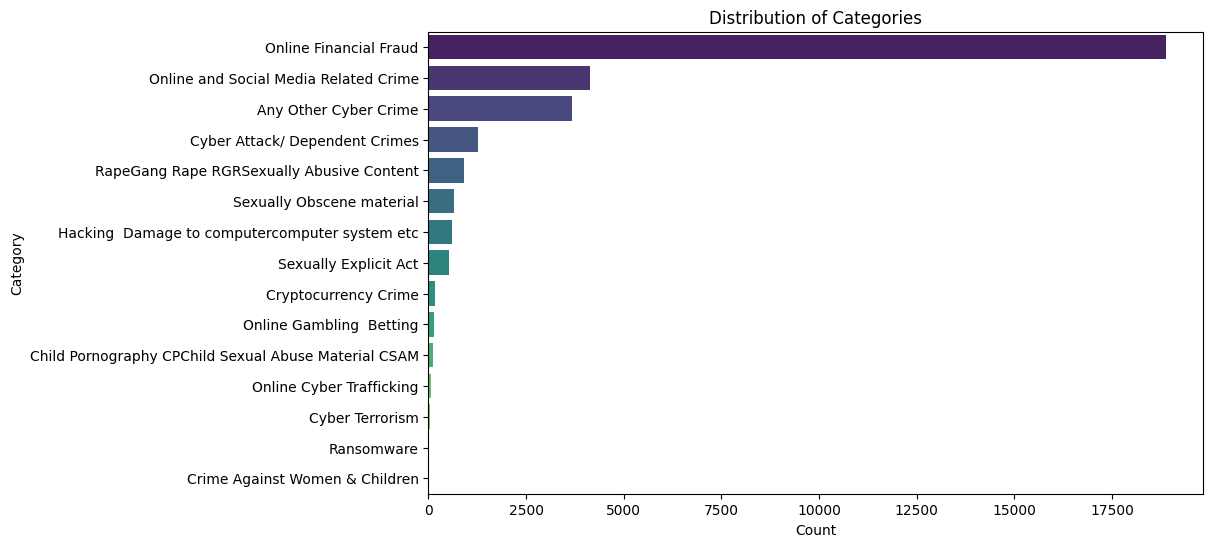

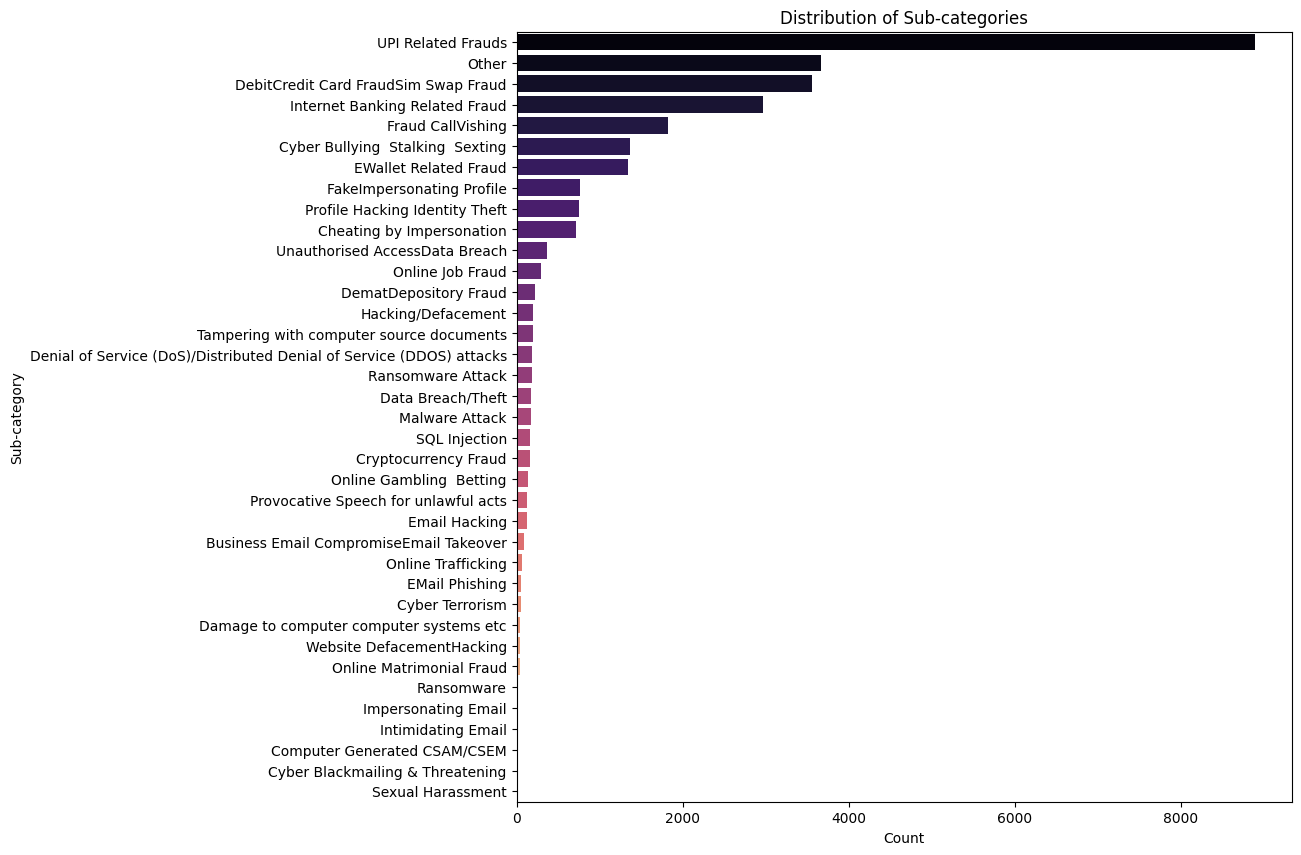

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=test_data['category'], order=test_data['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Sub-category Distribution
plt.figure(figsize=(10, 10))
sns.countplot(y=test_data['sub_category'], order=test_data['sub_category'].value_counts().index, palette='magma')
plt.title("Distribution of Sub-categories")
plt.xlabel("Count")
plt.ylabel("Sub-category")
plt.show()


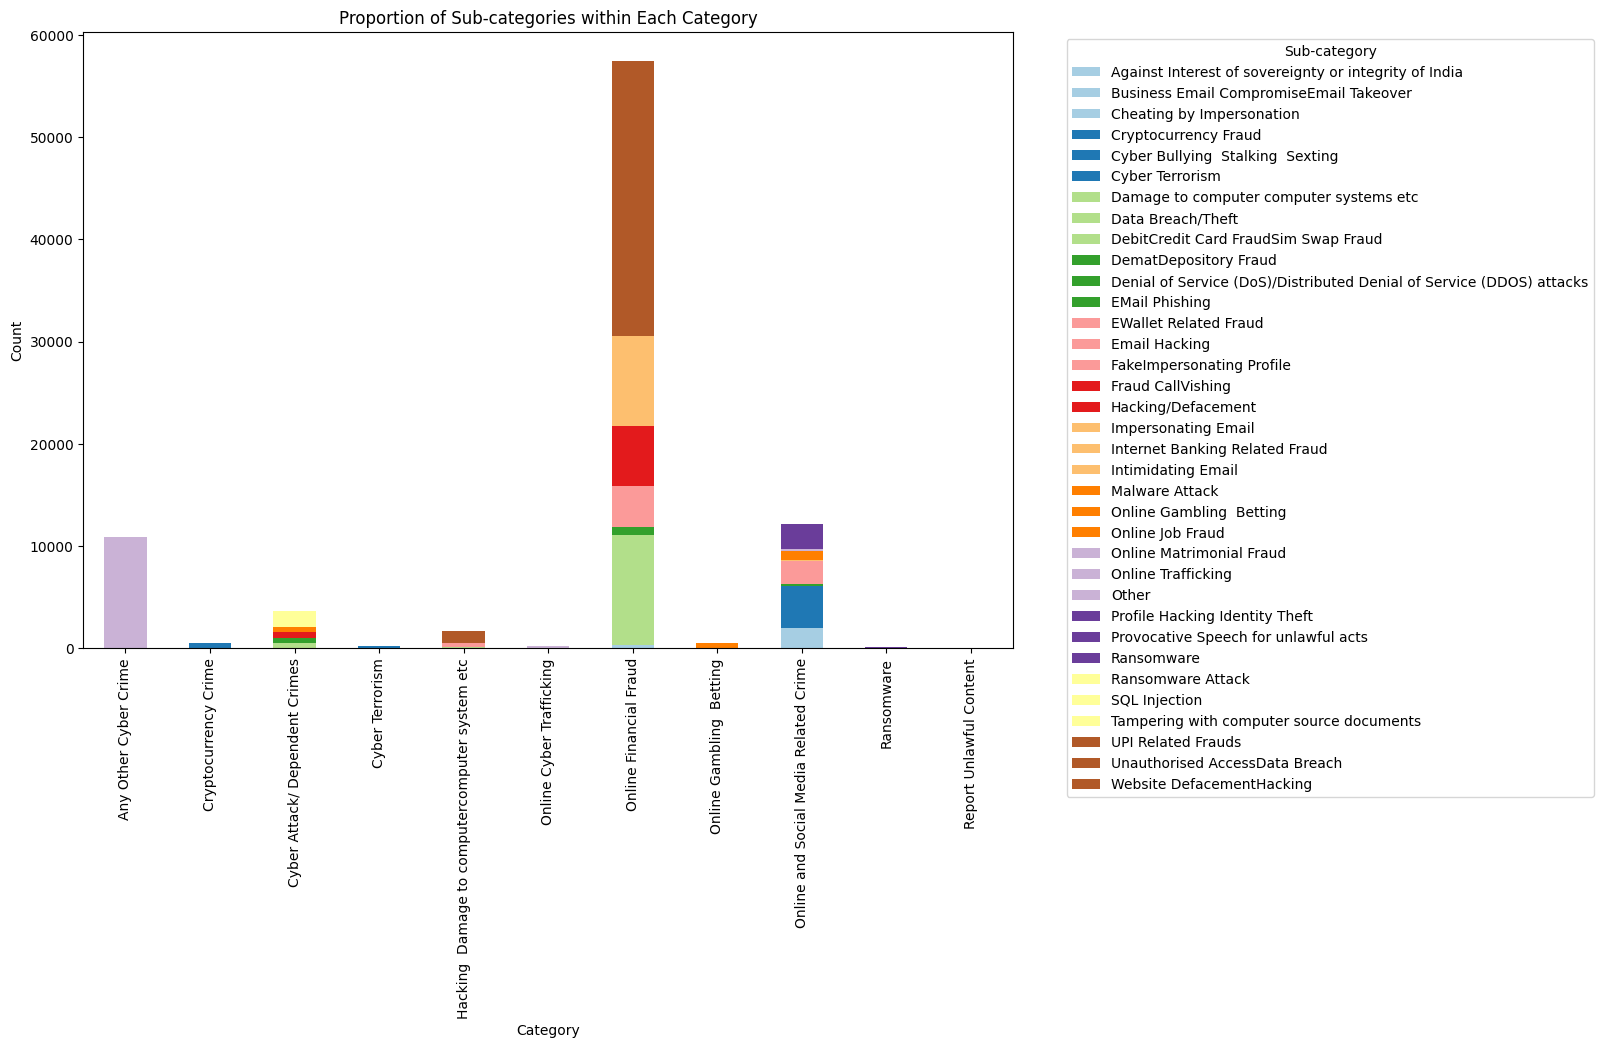

In [47]:
category_subcategory_counts = train_data.groupby(['category', 'sub_category']).size().unstack(fill_value=0)
category_subcategory_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title("Proportion of Sub-categories within Each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sub-category", bbox_to_anchor=(1.05, 1))
plt.show()


1481.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


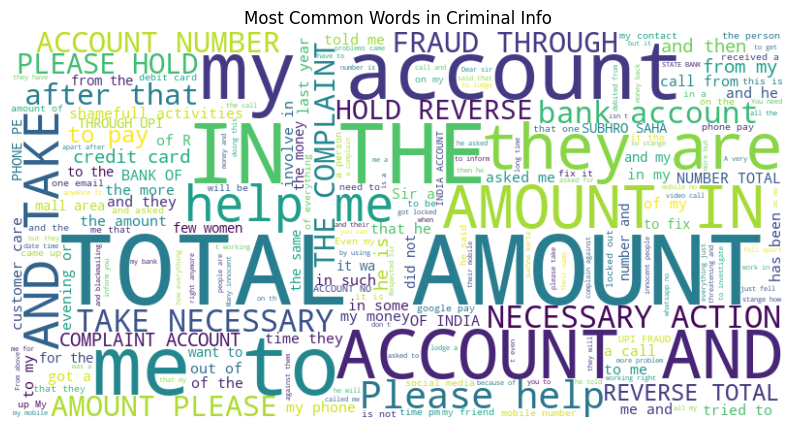

In [48]:
!pip install wordcloud

from wordcloud import WordCloud
# Convert all entries to strings and handle NaN values
text = " ".join(train_data['crimeaditionalinfo'].fillna("").astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, stopwords='english').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Criminal Info")
plt.show()


In [50]:

from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [51]:
%pip install textblob
%pip install pyspellchecker
from textblob import TextBlob
from spellchecker import SpellChecker

# Initialize the SpellChecker
spell = SpellChecker()

# Function to correct typos with TextBlob
def correct_spelling_textblob(text):
    blob = TextBlob(text)
    return str(blob.correct())

# Function to correct typos with SpellChecker
def correct_spelling_spellchecker(text):
    words = text.split()
    corrected_text = ' '.join([spell.correction(word) if word in spell else word for word in words])
    return corrected_text


1515.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1521.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


^C
Note: you may need to restart the kernel to use updated packages.


In [52]:
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [100]:
import pickle
import os

directory = '/Users/yughjuneja/Downloads/Hackathon'

with open(os.path.join(directory, '/Users/yughjuneja/Downloads/Hackathon/corpus.pkl'), 'rb') as f:
    corpus = pickle.load(f)

# Load the data from the pickle file
with open(os.path.join(directory, '/Users/yughjuneja/Downloads/Hackathon/test_processed_corpus.pkl'), 'rb') as f:
    test_corpus = pickle.load(f)

# Now you can use the 'test_corpus' variable

In [55]:
[[i, j, k] for i, j, k in zip(list(map(len, corpus)), corpus, train_data['crimeaditionalinfo']) if i < 1]


[[0,
  '',
  '                                                                                                                                                                      '],
 [0, '', '                                                         '],
 [0, '', '                                          '],
 [0, '', '                                   '],
 [0,
  '',
  '                                                                                                                                                                                                                                          '],
 [0,
  '',
  '                              \r\n                              \r\n'],
 [0,
  '',
  '                                                                                                                                                                                       '],
 [0, '', nan],
 [0,
  '',
  '                                                                        

In [56]:
combined_corpus = corpus + test_corpus


In [57]:
len(combined_corpus)

124915

In [58]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
test_words=[]

for sent in test_corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        test_words.append(simple_preprocess(sent))

In [ ]:
import nltk
nltk.download('punkt')

combined_words=[]

for sent in combined_corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        combined_words.append(simple_preprocess(sent))

In [ ]:
# Train Word2Vec model on the combined corpus
unified_model = gensim.models.Word2Vec(combined_words, vector_size=100, epochs=50)
unified_model.save("C:/games/Hackathon/word2vec_combined.model")


In [ ]:
unified_model.wv.similar_by_word("thanks")

[('thank', 0.8364834189414978),
 ('thanking', 0.7894559502601624),
 ('thankyou', 0.7220860123634338),
 ('thankful', 0.6270253658294678),
 ('faithfully', 0.6257802844047546),
 ('highly', 0.6097707152366638),
 ('regard', 0.6093935370445251),
 ('sincerely', 0.5816956758499146),
 ('earliest', 0.5703334808349609),
 ('pl', 0.5577220320701599)]

In [ ]:
train_model=Word2Vec.load("C:/games/Hackathon/word2vec_train.model")
test_model = Word2Vec.load("C:/games/Hackathon/word2vec_test.model")


In [ ]:
train_model.wv['pls']

array([-0.6697286 , -1.9772313 ,  1.2840456 , -0.5838696 , -1.2632291 ,
        0.64935565,  0.09112354, -0.6343608 , -1.3751774 ,  0.82024145,
       -0.6194717 ,  0.7569566 , -0.16013254,  0.12597895,  1.6208152 ,
       -0.02703657,  1.4080873 ,  0.64473957, -2.5256147 ,  1.4892691 ,
        2.16894   ,  0.93266803, -2.619227  , -0.06607248,  0.13264954,
       -1.8494719 ,  0.24515936, -0.6371646 , -0.05602286,  0.17532755,
        1.6117858 , -0.9309804 , -1.2454442 ,  0.3094135 , -0.8745694 ,
        0.4906274 ,  0.49403197,  0.37439203,  0.51211536, -2.3138094 ,
        3.8522553 , -1.5828251 ,  0.26207915, -1.1008648 , -1.8464085 ,
        0.9541719 ,  2.957601  ,  1.2233706 ,  0.33970898, -0.26344532,
       -1.689627  ,  1.42103   , -0.06002699, -2.687125  , -0.18303506,
       -1.3367206 ,  3.461054  ,  1.2341261 , -1.411357  , -1.148025  ,
        0.6661022 , -1.1805897 , -0.38043547, -0.4199889 ,  0.14953065,
        0.6563387 , -0.16557646,  1.9570664 , -0.43503934,  1.24

In [ ]:
import numpy as np
def avg_word2vec(doc, model):
    # Only keep words that are in the model's vocabulary
    valid_words = [model.wv[word] for word in doc if word in model.wv.key_to_index]
    return np.mean(valid_words, axis=0) if valid_words else np.zeros(model.vector_size)


In [ ]:
from tqdm import tqdm
import numpy as np

# Compute Word2Vec vectors for train data with progress bar
train_X = [avg_word2vec(doc, unified_model) for doc in tqdm(words, desc="Computing Word2Vec for Train Data")]

# Compute Word2Vec vectors for test data with progress bar
test_X = [avg_word2vec(doc, unified_model) for doc in tqdm(test_words, desc="Computing Word2Vec for Test Data")]

# Convert to NumPy arrays
train_X = np.array(train_X)
test_X = np.array(test_X)

# Print shapes of the resulting arrays
print(f"train_X shape: {train_X.shape}")
print(f"test_X shape: {test_X.shape}")


Computing Word2Vec for Train Data:   0%|          | 0/92441 [00:00<?, ?it/s]

Computing Word2Vec for Test Data: 100%|██████████| 30836/30836 [00:07<00:00, 4327.59it/s]


train_X shape: (92441, 100)
test_X shape: (30836, 100)


In [ ]:
train_X[0]


array([-0.82626408, -0.38287938,  0.09864611,  0.65018791, -0.23706798,
       -0.20536858,  0.92195863,  1.25278878, -0.22048694,  1.36601651,
       -1.47415233, -0.2848393 , -0.59919804,  0.91162843, -0.29612145,
       -0.5413062 , -0.42091471, -0.59744173,  0.62199044,  0.17662421,
        0.97439581, -0.49263632, -0.23820464,  0.87569243, -0.27269804,
       -0.54405236,  2.25273585, -0.90844458, -0.70477402,  1.26864421,
        0.47412929, -1.53944993,  0.25185981,  0.20872904, -0.54524916,
       -0.50007999,  0.58785659,  0.66730231,  0.13574666,  0.14730518,
        0.81436241, -0.03215264, -0.11880578, -0.51433909, -0.88183337,
        0.01804905, -0.93916136,  1.93041813, -1.16127586, -1.04946768,
        0.82500696,  0.60551769,  0.17591484,  0.41853806,  0.41915566,
        0.38153675,  0.47488105, -1.28973305, -0.15116324, -1.96915877,
        0.78717691, -0.15097675, -0.00837704, -1.70721292,  0.01854813,
       -0.53973055, -0.21335022, -0.22603171, -1.68598378, -0.81

In [ ]:
len(test_words)

30836

In [ ]:
directory = "C:/games/Hackathon/"

# Check if the directory exists, and create it if it doesn't
os.makedirs(directory, exist_ok=True)

# Convert to DataFrame
train_df = pd.DataFrame(train_X)
test_df = pd.DataFrame(test_X)

# Save DataFrames as CSV
train_df.to_csv(os.path.join(directory, "train_X.csv"), index=False)
test_df.to_csv(os.path.join(directory, "test_X.csv"), index=False)

# Optionally, print confirmation
print("train_X and test_X have been saved as CSV in the specified directory.")

train_X and test_X have been saved as CSV in the specified directory.


In [86]:
train_data_filtered=pd.read_csv("/Users/yughjuneja/Downloads/Hackathon/train_encoded_filtered.csv")
test_data_filtered=pd.read_csv("/Users/yughjuneja/Downloads/Hackathon/test_encoded_filtered.csv")

In [87]:
y_train_category=train_data_filtered['category_encoded']
y_train_subcategory = train_data_filtered['sub_category_encoded']
y_test_category = test_data_filtered['category_encoded']
y_test_subcategory = test_data_filtered['sub_category_encoded']

In [88]:
df=pd.read_csv("/Users/yughjuneja/Downloads/Hackathon/train_X.csv")
test_df=pd.read_csv("/Users/yughjuneja/Downloads/Hackathon/test_X.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.826264,-0.382879,0.098646,0.650188,-0.237068,-0.205369,0.921959,1.252789,-0.220487,1.366017,...,0.978965,-0.631327,-0.370301,-0.098234,2.282928,1.134213,-0.176971,-0.318324,1.386659,0.058446
1,-0.925591,0.430818,-1.291255,-0.438423,0.039556,-0.290096,0.641796,1.814173,0.624029,1.714331,...,0.923464,-0.075537,-0.483911,0.696540,3.299527,0.812439,-0.495236,-0.196592,0.458231,0.212975
2,-1.512013,-0.662454,0.105002,0.958181,0.203146,0.290996,1.068054,0.207290,0.867797,1.591931,...,1.415353,-1.094227,-0.355211,0.513565,2.266954,0.448564,-0.831468,1.152245,0.354978,-0.742529
3,-0.680730,-0.964706,0.360332,1.622177,-0.372946,-0.107539,0.521910,0.045790,-0.074750,-0.197071,...,-0.622135,0.165001,-0.685489,1.023561,1.487194,-0.105884,-1.788521,0.334563,-0.014221,-0.600173
4,-0.784880,1.152571,-0.759890,1.703395,-0.059702,-0.528895,1.945542,1.348375,-1.410957,-0.743131,...,-0.024811,0.218288,-0.285480,0.044044,2.012556,0.229944,-0.000716,-1.182403,0.830027,-0.987403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92436,-1.448487,-1.037411,-0.715003,0.802677,-0.043798,-1.207362,0.112118,-0.612526,0.155671,0.157304,...,0.419161,1.899046,0.039949,-1.294788,1.575831,-0.602667,-1.153791,-0.993305,-0.214985,0.572812
92437,-0.400005,-0.187005,0.080319,2.614311,0.432709,-0.556982,0.905570,0.863303,-0.662987,-0.524800,...,0.034911,0.687850,1.054786,0.423726,2.561662,0.374638,-0.874591,0.574382,-0.322858,0.496977
92438,-1.989351,0.549925,-1.166999,-0.314275,-1.353298,-0.879990,0.894008,-0.056804,-0.536188,1.540447,...,2.338152,0.121524,-1.059114,-0.774805,2.359653,1.211097,-1.111785,-1.732833,0.398844,-0.013319
92439,1.216173,0.787495,-1.580380,-1.782058,-0.002825,0.710888,-0.733887,-1.099803,0.438867,-0.518928,...,-0.969885,0.989247,0.071751,-0.932889,-3.222515,-1.516679,0.552810,-0.275580,-0.036780,0.605537


In [90]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.777668,0.507151,-0.893367,-0.078353,-0.043195,0.713733,-0.922961,0.194778,0.794385,-0.324004,...,-0.543471,0.579145,0.285621,-0.274132,-1.792482,-0.894402,0.224299,0.340762,-0.247085,0.954928
1,-2.015642,-0.548083,1.161100,2.261739,2.280842,-1.084167,2.160407,0.588929,0.616499,-1.651271,...,-1.183475,0.695699,0.617150,-0.466419,0.695312,-0.164366,-1.053053,-0.799187,-1.079011,1.343149
2,0.355010,-1.550160,-0.414979,-0.068099,0.363585,0.036061,-0.273642,-0.140235,0.998007,0.321758,...,1.563293,0.340062,0.945902,2.440827,0.966998,1.238896,-0.312909,0.008472,-1.486981,0.862930
3,-0.526124,-0.847453,-0.110300,-0.079531,0.578695,0.343662,-0.507244,0.598253,0.188917,0.393387,...,-0.031395,-0.602676,-0.129888,0.254208,0.164316,0.589629,-0.671867,-1.243933,1.350456,-0.164615
4,0.202403,-0.698732,-0.756722,0.622262,-0.140374,1.116788,0.622404,0.383385,-0.675998,-0.271961,...,-0.532420,0.477684,0.288212,0.556890,1.672064,1.116402,-1.035357,0.023287,-0.294005,0.660915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30831,-0.641516,0.054961,0.124166,0.297149,-0.744182,-0.624626,1.059487,0.727207,-0.501377,0.269007,...,1.044928,-0.376269,0.052618,0.516782,2.300349,0.912464,-1.070255,-0.554503,0.501004,-0.866983
30832,0.003403,-0.288854,1.756475,2.509319,0.476166,-0.683786,1.467937,0.145061,-0.525636,-0.935952,...,0.435721,-0.690259,0.337361,-0.318656,2.938887,0.257031,-0.460067,-0.823829,0.785097,-0.378101
30833,1.398444,0.956573,-1.041874,-1.699760,0.210322,0.430891,-1.330025,-1.246765,0.706876,-0.416866,...,-1.185595,0.528548,-0.186572,-1.045881,-2.740846,-1.517864,0.334279,-0.288835,0.490010,0.202639
30834,-1.476511,-1.093585,-0.425011,2.611840,0.298179,-1.334082,2.121917,1.104864,0.096274,-1.119618,...,0.284201,1.242683,1.503251,-0.464539,2.854720,-0.030220,0.450167,0.383184,0.509219,0.104724


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Replace NaN values with "Unknown" in both train and test data
train_data_copy['category'] = train_data_copy['category'].fillna('Unknown')
train_data_copy['sub_category'] = train_data_copy['sub_category'].fillna('Unknown')

test_data_copy['category'] = test_data_copy['category'].fillna('Unknown')
test_data_copy['sub_category'] = test_data_copy['sub_category'].fillna('Unknown')

# Initialize LabelEncoders for category and sub_category columns
label_encoder_category = LabelEncoder()
label_encoder_sub_category = LabelEncoder()

# Step 1: Combine unique values of categories and subcategories from both datasets
all_categories = list(set(train_data_copy['category']).union(set(test_data_copy['category'])))
all_subcategories = list(set(train_data_copy['sub_category']).union(set(test_data_copy['sub_category'])))

# Step 2: Fit the label encoders on the combined unique values
label_encoder_category.fit(all_categories)
label_encoder_sub_category.fit(all_subcategories)

# Step 3: Filter data based on non-empty 'corpus' and apply label encoding for train data
train_data_filtered = train_data_copy[list(map(lambda x: len(x) > 0, corpus))]
test_data_filtered = test_data_copy[list(map(lambda x: len(x) > 0, test_corpus))]

y_train_category = label_encoder_category.transform(train_data_filtered['category'])
y_train_subcategory = label_encoder_sub_category.transform(train_data_filtered['sub_category'])

# Step 4: Transform test data with handling for unseen labels
y_test_category = test_data_filtered['category'].apply(
    lambda x: label_encoder_category.transform([x])[0] if x in label_encoder_category.classes_ else -1
).values

y_test_subcategory = test_data_filtered['sub_category'].apply(
    lambda x: label_encoder_sub_category.transform([x])[0] if x in label_encoder_sub_category.classes_ else -1
).values

# Optional: Save the encoded datasets and labels for future use
train_data_filtered['category_encoded'] = y_train_category
train_data_filtered['sub_category_encoded'] = y_train_subcategory

test_data_filtered['category_encoded'] = y_test_category
test_data_filtered['sub_category_encoded'] = y_test_subcategory

train_data_filtered.to_csv("train_encoded_filtered.csv", index=False)
test_data_filtered.to_csv("test_encoded_filtered.csv", index=False)


In [ ]:
train_data_filtered

,category,sub_category,crimeaditionalinfo,category_encoded,sub_category_encoded
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,10,6
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,8,17
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,9,23
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,10,24
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,8,17
...,...,...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,8,20
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,8,14
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,8,35
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,10,25


In [ ]:
test_data_filtered

,category,sub_category,crimeaditionalinfo,category_encoded,sub_category_encoded
0,RapeGang Rape RGRSexually Abusive Content,Unknown,Sir namaskar mein Ranjit Kumar PatraPaise neh...,12,37
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT,8,10
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...,4,32
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...,8,17
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...,0,27
...,...,...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...,10,25
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...,8,20
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...,0,27
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...,8,20


In [ ]:
corpus_save=corpus
test_corpus_save=test_corpus

In [72]:
import numpy as np
import pandas as pd

# Check if there are any NaN or missing values in y_train and y_test categories and subcategories
train_nulls_category = np.isnan(y_train_category).any()  # Check if any NaN in y_train_category
train_nulls_subcategory = np.isnan(y_train_subcategory).any()  # Check if any NaN in y_train_subcategory

test_nulls_category = np.isnan(y_test_category).any()  # Check if any NaN in y_test_category
test_nulls_subcategory = np.isnan(y_test_subcategory).any()  # Check if any NaN in y_test_subcategory

# Print the results
print(f"Any null values in y_train_category: {train_nulls_category}")
print(f"Any null values in y_train_subcategory: {train_nulls_subcategory}")
print(f"Any null values in y_test_category: {test_nulls_category}")
print(f"Any null values in y_test_subcategory: {test_nulls_subcategory}")


Any null values in y_train_category: False
Any null values in y_train_subcategory: False
Any null values in y_test_category: False
Any null values in y_test_subcategory: False


In [91]:
X=df

In [74]:
from sklearn.model_selection import train_test_split
X_Sub_Category_train, X_Sub_Category_temp, y_Sub_Category_train, y_Sub_Category_temp=train_test_split(X, y_train_subcategory, test_size=0.4, random_state=42)

X_Sub_Category_test, X_Sub_Category_val, y_Sub_Category_test, y_Sub_Category_val=train_test_split(X_Sub_Category_temp, y_Sub_Category_temp, test_size=0.5, random_state=42)

In [80]:
print(train_data_filtered.columns)


Index(['category', 'sub_category', 'crimeaditionalinfo', 'category_encoded',
       'sub_category_encoded'],
      dtype='object')


In [83]:
print(np.unique(y_train))  # or y_test if you're checking test labels


NameError: name 'y_train' is not defined

In [111]:
print("Length of corpus:", len(test_corpus))
print("Length of train_encoded:", len(test_data_filtered))


Length of corpus: 30836
Length of train_encoded: 30836


In [105]:
corpus = corpus[:len(train_data_filtered)]  # Trim corpus to match the length of train_encoded


In [110]:
 test_corpus = test_corpus[:len(test_data_filtered)]  # Trim corpus to match the length of train_encoded


In [124]:
# Import required libraries
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle
import os

# Constants for text processing and model architecture
MAX_WORDS = 10000
MAX_LEN = 100
EMBEDDING_DIM = 200
LSTM_UNITS = 128

# Prepare text data for LSTM model with proper alignment and validation
def prepare_text_data(corpus, test_corpus, train_encoded, test_encoded):
    """
    Prepare text data for LSTM model with proper alignment and validation
    
    Parameters:
    -----------
    corpus : list
        Training text corpus
    test_corpus : list
        Test text corpus
    train_encoded : pd.DataFrame
        Encoded training labels
    test_encoded : pd.DataFrame
        Encoded test labels
        
    Returns:
    --------
    tuple
        Processed training data, test data, tokenizer, and filtered encodings
    """
    # Validate input lengths
    print(f"Initial lengths - Corpus: {len(corpus)}, Train encoded: {len(train_encoded)}")
    print(f"Initial lengths - Test corpus: {len(test_corpus)}, Test encoded: {len(test_encoded)}")
    
    # Ensure corpus and encoded data have matching lengths
    min_train_len = min(len(corpus), len(train_encoded))
    min_test_len = min(len(test_corpus), len(test_encoded))
    
    corpus = corpus[:min_train_len]
    train_encoded = train_encoded.iloc[:min_train_len]
    test_corpus = test_corpus[:min_test_len]
    test_encoded = test_encoded.iloc[:min_test_len]
    
    # Filter out empty entries and align data
    valid_train_indices = [i for i, text in enumerate(corpus) if isinstance(text, str) and len(text.strip()) > 0]
    valid_test_indices = [i for i, text in enumerate(test_corpus) if isinstance(text, str) and len(text.strip()) > 0]
    
    print(f"Valid indices - Train: {len(valid_train_indices)}, Test: {len(valid_test_indices)}")
    
    # Filter corpus and encoded data
    filtered_corpus = [corpus[i] for i in valid_train_indices]
    filtered_test_corpus = [test_corpus[i] for i in valid_test_indices]
    
    # Ensure indices are within bounds
    valid_train_indices = [i for i in valid_train_indices if i < len(train_encoded)]
    valid_test_indices = [i for i in valid_test_indices if i < len(test_encoded)]
    
    filtered_train_encoded = train_encoded.iloc[valid_train_indices].reset_index(drop=True)
    filtered_test_encoded = test_encoded.iloc[valid_test_indices].reset_index(drop=True)
    
    print(f"Filtered lengths - Train: {len(filtered_corpus)}, Test: {len(filtered_test_corpus)}")
    
    # Initialize and fit tokenizer
    tokenizer = Tokenizer(num_words=MAX_WORDS)
    tokenizer.fit_on_texts(filtered_corpus + filtered_test_corpus)
    
    # Convert text to sequences
    X_train_seq = tokenizer.texts_to_sequences(filtered_corpus)
    X_test_seq = tokenizer.texts_to_sequences(filtered_test_corpus)
    
    # Pad sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN)
    X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN)
    
    print(f"Final shapes - X_train: {X_train_pad.shape}, X_test: {X_test_pad.shape}")
    
    return X_train_pad, X_test_pad, tokenizer, filtered_train_encoded, filtered_test_encoded

# Load and validate the data files
def load_and_validate_data():
    """
    Load and validate the data files
    """
    try:
        # Load corpus data
        with open('corpus.pkl', 'rb') as f:
            corpus = pickle.load(f)
        
        with open('test_processed_corpus.pkl', 'rb') as f:
            test_corpus = pickle.load(f)
        
        # Load encoded labels
        train_encoded = pd.read_csv("train_encoded_filtered.csv")
        test_encoded = pd.read_csv("test_encoded_filtered.csv")
        
        print("Data loaded successfully")
        print(f"Corpus size: {len(corpus)}")
        print(f"Test corpus size: {len(test_corpus)}")
        print(f"Train encoded size: {len(train_encoded)}")
        print(f"Test encoded size: {len(test_encoded)}")
        
        return corpus, test_corpus, train_encoded, test_encoded
        
    except FileNotFoundError as e:
        print(f"Error loading data: {e}")
        raise
    except Exception as e:
        print(f"Unexpected error: {e}")
        raise

# Create and train LSTM model
def create_lstm_model(num_classes, input_dim):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))
    model.add(Bidirectional(LSTM(LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train LSTM model
def train_lstm_model(X_train, y_train, model_name):
    """
    Train the LSTM model for classification
    
    Parameters:
    -----------
    X_train : numpy.ndarray
        Training input data
    y_train : numpy.ndarray
        Training labels
    model_name : str
        Name for saving model
    
    Returns:
    --------
    model : tensorflow.keras.Model
        Trained model
    history : tensorflow.keras.callbacks.History
        Training history
    """
    y_train_cat = to_categorical(y_train)
    X_train, X_val, y_train_split, y_val = train_test_split(X_train, y_train_cat, test_size=0.2, random_state=42)
    
    model = create_lstm_model(y_train_cat.shape[1], MAX_WORDS)
    
    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            f'{model_name}_best.keras',  # Change .h5 to .keras here
            monitor='val_accuracy',
            save_best_only=True
        )
    ]
    
    # Train model
    history = model.fit(
        X_train, y_train_split,
        validation_data=(X_val, y_val),
        epochs=50, batch_size=64,
        callbacks=callbacks
    )
    
    return model, history

# Main execution
def main():
    # Load and validate data
    corpus, test_corpus, train_encoded, test_encoded = load_and_validate_data()
    
    # Prepare text data with aligned indices
    X_train_pad, X_test_pad, tokenizer, filtered_train_encoded, filtered_test_encoded = prepare_text_data(
        corpus, test_corpus, train_encoded, test_encoded
    )
    
    # Verify data alignment
    assert len(X_train_pad) == len(filtered_train_encoded), "Training data and labels mismatch"
    assert len(X_test_pad) == len(filtered_test_encoded), "Test data and labels mismatch"
    
    # Save tokenizer
    with open('tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    
    # Train category model
    print("\nTraining category model...")
    category_model, category_history = train_lstm_model(
        X_train_pad, 
        filtered_train_encoded['category_encoded'].values,
        'category_lstm'
    )
    
    # Train subcategory model
    print("\nTraining subcategory model...")
    subcategory_model, subcategory_history = train_lstm_model(
        X_train_pad, 
        filtered_train_encoded['sub_category_encoded'].values,
        'subcategory_lstm'
    )
    
    # Save models
    category_model.save('category_lstm_model.keras')
    subcategory_model.save('subcategory_lstm_model.keras')
    
    # Make predictions
    category_preds = category_model.predict(X_test_pad)
    subcategory_preds = subcategory_model.predict(X_test_pad)
    
    return {
        'category_preds': category_preds,
        'subcategory_preds': subcategory_preds,
        'category_history': category_history.history,
        'subcategory_history': subcategory_history.history,
        'filtered_train_encoded': filtered_train_encoded,
        'filtered_test_encoded': filtered_test_encoded
    }

if __name__ == "__main__":
    results = main()


Data loaded successfully
Corpus size: 93686
Test corpus size: 31229
Train encoded size: 92441
Test encoded size: 30836
Initial lengths - Corpus: 93686, Train encoded: 92441
Initial lengths - Test corpus: 31229, Test encoded: 30836
Valid indices - Train: 91214, Test: 30446
Filtered lengths - Train: 91214, Test: 30446
Final shapes - X_train: (91214, 100), X_test: (30446, 100)

Training category model...
Epoch 1/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 214s 186ms/step - accuracy: 0.6082 - loss: 1.5115 - val_accuracy: 0.6110 - val_loss: 1.3719
Epoch 2/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 222s 195ms/step - accuracy: 0.6152 - loss: 1.3963 - val_accuracy: 0.6110 - val_loss: 1.3741
Epoch 3/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 216s 190ms/step - accuracy: 0.6139 - loss: 1.3753 - val_accuracy: 0.6110 - val_loss: 1.3826
Epoch 4/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 205s 180ms/step - accuracy: 0.6125 - loss: 1.3381 - val_accuracy: 0.6102 - val_loss: 1.4197

Training subcategory model...
Epoch 1/50
1141/1141 ━━━━━━━

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import re
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

class CrimePredictionPipeline:
    def __init__(self, 
                 word2vec_model_path='word2vec_combined.model',
                 sub_category_model_path='subcategory_lstm_model.keras',
                 category_model_path='category_lstm_model.keras',
                 tokenizer_path='tokenizer.pkl'):
        # Initialize nltk resources
        nltk.download('wordnet', quiet=True)
        nltk.download('stopwords', quiet=True)
        
        # Initialize lemmatizer and stop words
        self.lem = WordNetLemmatizer()
        self.stop_words = set(stopwords.words("english"))
        
        # Load models and encoders
        self.load_models(
            word2vec_model_path, 
            sub_category_model_path, 
            category_model_path,
            tokenizer_path
        )
    
    def load_models(self, word2vec_path, sub_category_model_path, 
                    category_model_path, tokenizer_path):
        # Load Word2Vec model
        self.word2vec_model = gensim.models.Word2Vec.load(word2vec_path)
        
        # Load tokenizer
        with open(tokenizer_path, 'rb') as f:
            self.tokenizer = pickle.load(f)
        
        # Load Keras models
        import tensorflow as tf
        self.sub_category_model = tf.keras.models.load_model(sub_category_model_path)
        self.category_model = tf.keras.models.load_model(category_model_path)
        
        # Load label encoders
        train_encoded = pd.read_csv("train_encoded_filtered.csv")
        self.sub_category_encoder = LabelEncoder()
        self.category_encoder = LabelEncoder()
        
        self.sub_category_encoder.fit(train_encoded['sub_category'])
        self.category_encoder.fit(train_encoded['category'])
    
    def preprocess_text(self, text):
        if pd.isna(text):
            return []
        
        # Remove non-alphabetic characters
        col = re.sub(r'[^a-zA-Z\s]', ' ', str(text))
        col = col.lower()
        col = col.split()
        
        # Lemmatize and remove stop words
        col = [self.lem.lemmatize(word) for word in col if word not in self.stop_words]
        
        return col
    
    def text_to_sequence(self, text):
        # Preprocess text
        processed_text = self.preprocess_text(text)
        processed_text = ' '.join(processed_text)
        
        # Convert to sequence
        sequence = self.tokenizer.texts_to_sequences([processed_text])
        
        # Pad sequence
        from tensorflow.keras.preprocessing.sequence import pad_sequences
        padded_sequence = pad_sequences(sequence, maxlen=100)
        
        return padded_sequence
    
    def predict_sub_category(self, text):
        # Convert text to padded sequence
        text_sequence = self.text_to_sequence(text)
        
        # Predict sub-category
        sub_category_pred_proba = self.sub_category_model.predict(text_sequence)[0]
        sub_category_pred_idx = np.argmax(sub_category_pred_proba)
        sub_category_pred = self.sub_category_encoder.inverse_transform([sub_category_pred_idx])[0]
        
        return sub_category_pred
    
    def predict_category(self, text, sub_category):
        # Convert text to padded sequence
        text_sequence = self.text_to_sequence(text)
        
        # Encode sub-category
        sub_category_encoded = self.sub_category_encoder.transform([sub_category])[0]
        
        # Predict category
        category_pred_proba = self.category_model.predict(text_sequence)[0]
        category_pred_idx = np.argmax(category_pred_proba)
        category_pred = self.category_encoder.inverse_transform([category_pred_idx])[0]
        
        return category_pred
    
    def predict(self, text):
        # First predict sub-category
        sub_category_pred = self.predict_sub_category(text)
        
        # Then predict category
        category_pred = self.predict_category(text, sub_category_pred)
        
        return {
            'sub_category': sub_category_pred,
            'category': category_pred
        }

def process_test_data(test_data_path, output_path='test_data_predictions.csv'):
    # Load test data
    test_data = pd.read_csv(test_data_path)
    
    # Initialize pipeline
    pipeline = CrimePredictionPipeline()
    
    # Predict for each row
    results = []
    for text in test_data['crimeaditionalinfo']:
        try:
            prediction = pipeline.predict(text)
            results.append(prediction)
        except Exception as e:
            print(f"Prediction error for text: {text}")
            print(f"Error: {e}")
            results.append({'sub_category': None, 'category': None})
    
    # Add predictions to dataframe
    test_data['predicted_sub_category'] = [r['sub_category'] for r in results]
    test_data['predicted_category'] = [r['category'] for r in results]
    
    # Save results
    test_data.to_csv(output_path, index=False)
    
    return test_data

# Example usage
if __name__ == "__main__":
    # Replace with your actual test data path
    test_data_path = '/path/to/your/test_data.csv'
    predictions = process_test_data(test_data_path)
    print("Predictions completed and saved.")